In [ ]:
# Intro - Public companies sell stocks on stock markets so that investors can invest their money in a company, 
# their profits, and have voter rights at shareholder meetings.  It is one way a person can build wealth and 
# companies can raise money for products, services, and other initiatives.  A person can buy or sell a company’s 
# stock for either a profit or loss (O’Shea, 2020).  

# Stocks can have high returns, but they also have risks if the price goes down due to unforeseen circumstances 
#    Good or bad news that was made public about a company
#    Profits were not as high as expected
#    Widespread viruses affecting the world
#    Company downsizing or restructuring 
#    Bankruptcies
   
# Tools - Python, CSV

# Data - Retrieved the Kroger (KR) historical stock prices from the “Stock Market Dataset” that appeared on Kaggle.com
# Data contains stock information up to April 1, 2020 

# Data Fields
#   Date - specifies trading date
#   Open - opening price
#   High - maximum price during the day
#   Low - minimum price during the day
#   Close - close price adjusted for splits
#   Adj Close - adjusted close price adjusted for both dividends and splits
#   Volume - the number of shares that changed hands during a given day
 
# Methods/Evaluation/Techniques - Since stock prices and stock markets are volatile and there are many unknowns, it
# is hard to tell whether the models can be reliable or not. With the information that I reviewed for the Linear 
# Regression and Decision Tree models, I would think they would be more reliable if stocks did not fluctuate as 
# much. As with most things, experience and researching the various models and methods will help with making the
# models more accurate. The Decision Tree seemed to be the most accurate as it seemed to follow more of the 
# fluctuations in predicting the future stock close price. I did use some statistical significance when I was 
# evaluating the data by comparing the Open and Close prices, High and Low prices, and the Volume to see if I 
# could see any patterns that appeared.    

# Conclusion - Overall, it is tough to try to predict future stock Close prices based on many unknowns that factor 
# into the prices. I believe with more experience and research, machine learning can help with stock price forecasts.
# While it seems like machine learning has been used a lot with trying to predict stocks, people should consider 
# other methods outside of machine learning.  The other information may be able to show patterns in the data that 
# may not appear in machine learning models and methods. When there is more historical data that is used, it seems
# to help predict the stock Close prices better. When there is not as much data that is used, there could be 
# issues with the training of the datasets as it will not have a lot of the historical data. The forecasts will be
# skewed when there is stock volatility based on recent and past history and the time frame that is used. These 
# models may be better used when the data is not as unpredictable. Overall, it is possible when more preprocessing
# tasks are completed, the models can be trained to create more of an accurate picture.


In [714]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Read the csv file

KR = pd.read_csv('KR.csv', index_col = 0)

KR = KR.reset_index()

# Reads the first five lines of the file

KR.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1977-01-03,0.746094,0.746094,0.738281,0.742188,0.025383,156800
1,1977-01-04,0.742188,0.750000,0.738281,0.746094,0.025516,220800
2,1977-01-05,0.750000,0.757812,0.750000,0.757812,0.025917,134400
3,1977-01-06,0.757812,0.773438,0.757812,0.773438,0.026451,268800
4,1977-01-07,0.765625,0.765625,0.761719,0.761719,0.026051,169600


In [715]:
KR.info()

#KR = KR.drop(['Adj Close','Volume'], axis=1)

KR

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10907 entries, 0 to 10906
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10907 non-null  object 
 1   Open       10907 non-null  float64
 2   High       10907 non-null  float64
 3   Low        10907 non-null  float64
 4   Close      10907 non-null  float64
 5   Adj Close  10907 non-null  float64
 6   Volume     10907 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 596.6+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1977-01-03,0.746094,0.746094,0.738281,0.742188,0.025383,156800
1,1977-01-04,0.742188,0.750000,0.738281,0.746094,0.025516,220800
2,1977-01-05,0.750000,0.757812,0.750000,0.757812,0.025917,134400
3,1977-01-06,0.757812,0.773438,0.757812,0.773438,0.026451,268800
4,1977-01-07,0.765625,0.765625,0.761719,0.761719,0.026051,169600
...,...,...,...,...,...,...,...
10902,2020-03-26,28.000000,29.180000,27.330000,29.000000,29.000000,18238900
10903,2020-03-27,29.290001,29.900000,28.549999,29.129999,29.129999,14993000
10904,2020-03-30,30.000000,30.360001,29.120001,29.650000,29.650000,12972800
10905,2020-03-31,29.580000,30.260000,29.100000,30.120001,30.120001,17225200


In [716]:
KR = KR.sort_values('Date')

KR

,Date,Open,High,Low,Close,Adj Close,Volume
0,1977-01-03,0.746094,0.746094,0.738281,0.742188,0.025383,156800
1,1977-01-04,0.742188,0.750000,0.738281,0.746094,0.025516,220800
2,1977-01-05,0.750000,0.757812,0.750000,0.757812,0.025917,134400
3,1977-01-06,0.757812,0.773438,0.757812,0.773438,0.026451,268800
4,1977-01-07,0.765625,0.765625,0.761719,0.761719,0.026051,169600
...,...,...,...,...,...,...,...
10902,2020-03-26,28.000000,29.180000,27.330000,29.000000,29.000000,18238900
10903,2020-03-27,29.290001,29.900000,28.549999,29.129999,29.129999,14993000
10904,2020-03-30,30.000000,30.360001,29.120001,29.650000,29.650000,12972800
10905,2020-03-31,29.580000,30.260000,29.100000,30.120001,30.120001,17225200


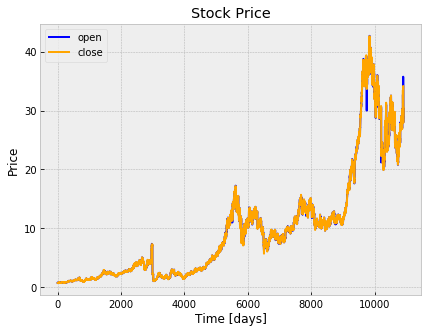

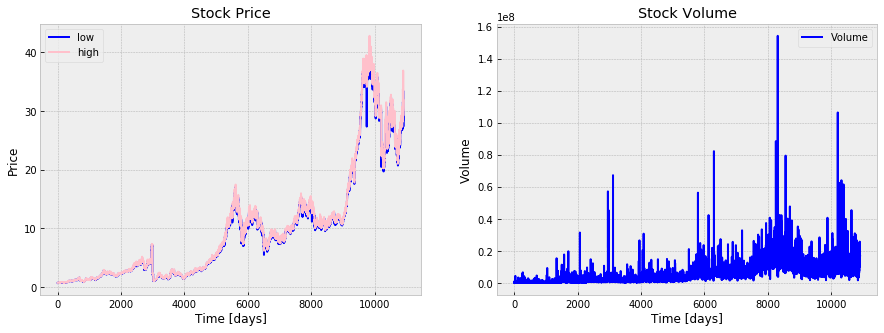

In [717]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(KR.Open.values, color='blue', label='open')
plt.plot(KR.Close.values, color='orange', label='close')
plt.title('Stock Price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(KR.Low.values, color='blue', label='low')
plt.plot(KR.High.values, color='pink', label='high')
plt.title('Stock Price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')


plt.subplot(1,2,2);
plt.plot(KR.Volume.values, color='blue', label='Volume')
plt.title('Stock Volume')
plt.xlabel('Time [days]')
plt.ylabel('Volume')
plt.legend(loc='best')


In [696]:


#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

df = pd.read_csv('KR.csv', index_col = 0)

df = df.reset_index()

df = df[df.Date > '2019-10-31']
df = df[df.Date < '2020-01-01']

df.head(20)
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['High','Low'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 10803 to 10843
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       41 non-null     datetime64[ns]
 1   Open       41 non-null     float64       
 2   Close      41 non-null     float64       
 3   Adj Close  41 non-null     float64       
 4   Volume     41 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.9 KB


In [697]:
df = df[['Close']]
df.head(4)

,Close
10803,24.99
10804,24.99
10805,27.83
10806,27.00


In [698]:
#Create a variable to predict 'x' days out into the future
future_days = 20

#Create a new column (the target or dependent variable) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)

#print the data
df.head(4)

,Close,Prediction
10803,24.99,27.740000
10804,24.99,27.389999
10805,27.83,27.639999
10806,27.00,26.799999


In [699]:
# Prediction column was dropped from X

X = np.array(df.drop(['Prediction'], 1))[:-future_days]

print(X)

[[24.98999977]
 [24.98999977]
 [27.82999992]
 [27.        ]
 [26.86000061]
 [27.02000046]
 [26.61000061]
 [27.        ]
 [27.05999947]
 [26.90999985]
 [26.75      ]
 [27.01000023]
 [26.87000084]
 [26.59000015]
 [26.70000076]
 [27.04999924]
 [27.        ]
 [27.04000092]
 [27.22999954]
 [27.34000015]
 [27.73999977]]


In [700]:
# Prediction column was dropped from Y

y = np.array(df['Prediction'])[:-future_days]

print(y)

[27.73999977 27.38999939 27.63999939 26.79999924 27.48999977 27.84000015
 27.87000084 28.02000046 28.20000076 28.09000015 28.30999947 28.70000076
 28.32999992 28.76000023 29.         28.88999939 29.10000038 28.88999939
 28.76000023 29.05999947 28.98999977]


In [707]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [708]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [709]:
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]

#Get the last 'x' rows
x_future = x_future.tail(future_days) 

#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[24.98999977],
       [27.82999992],
       [27.        ],
       [26.86000061],
       [27.02000046],
       [26.61000061],
       [27.        ],
       [27.05999947],
       [26.90999985],
       [26.75      ],
       [27.01000023],
       [26.87000084],
       [26.59000015],
       [26.70000076],
       [27.04999924],
       [27.        ],
       [27.04000092],
       [27.22999954],
       [27.34000015],
       [27.73999977]])

In [710]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print('Tree Prediction')
print( tree_prediction )

#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print('Linear Regression Prediction')
print(lr_prediction)

Tree Prediction
[27.38999939 27.63999939 28.02000046 28.09000015 27.84000015 27.87000084
 28.02000046 28.20000076 28.09000015 28.30999947 28.02000046 28.09000015
 28.76000023 29.         28.88999939 28.02000046 28.88999939 28.76000023
 29.05999947 28.98999977]

Linear Regression Prediction
[27.68130342 28.65905467 28.37330347 28.32510467 28.3801892  28.23903503
 28.37330347 28.39396    28.34231834 28.28723382 28.37674633 28.32854754
 28.2321493  28.27002015 28.39051713 28.37330347 28.38707493 28.45248738
 28.49035824 28.62806954]


/Users/rachel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


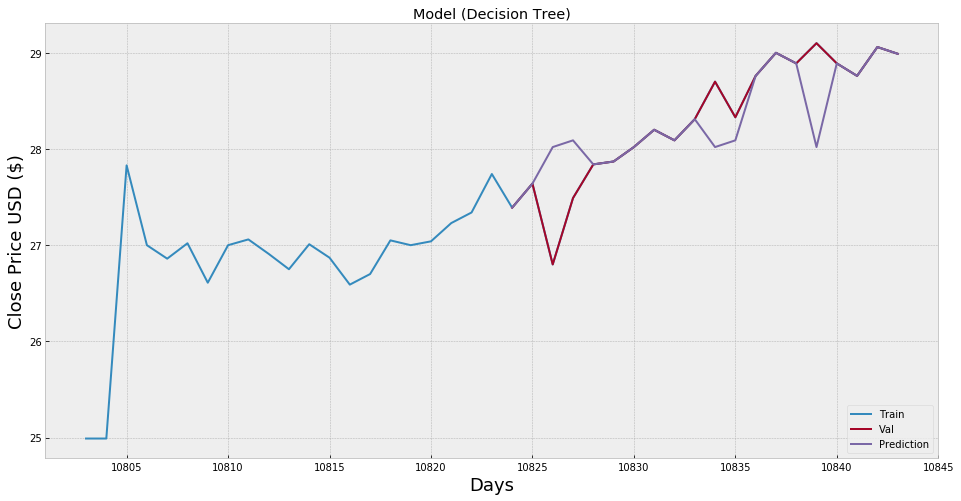

In [712]:
#Visualize the data
predictions = tree_prediction

#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model (Decision Tree)')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

/Users/rachel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


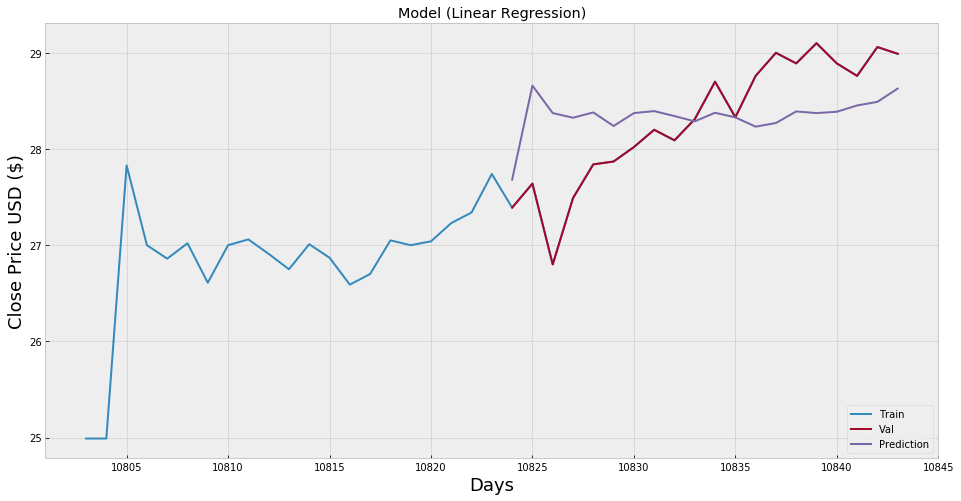

In [713]:
#Visualize the data
predictions = lr_prediction

#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model (Linear Regression)')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()